# Decision Trees and Random Forests algorithms - easier

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

## PREPARE DATA

### Dataset:
https://www.kaggle.com/abbasit/kyphosis-dataset

In [2]:
#Read dataset
df = pd.read_csv('./Dataset/kyphosis.csv')

In [3]:
#First 5 rows
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
#Info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


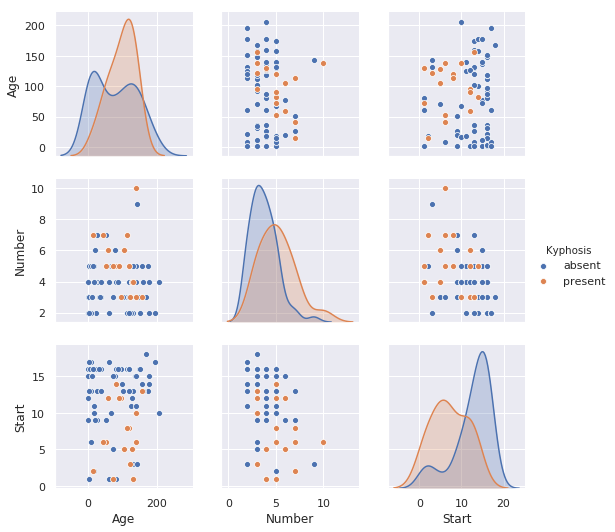

In [5]:
#Correlation between columns split by 'Kyphosis' columns
sns.pairplot(df, hue='Kyphosis')

In [6]:
#Split data for features and labels
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [7]:
#Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## DECISION TREE

In [8]:
#Create Decision Tree
dtree = DecisionTreeClassifier()

In [9]:
#Train classifier
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
#Predict test labels
pred = dtree.predict(X_test)

In [11]:
#Show metrics for test dataset
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[12  5]
 [ 6  2]]


              precision    recall  f1-score   support

      absent       0.67      0.71      0.69        17
     present       0.29      0.25      0.27         8

   micro avg       0.56      0.56      0.56        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.54      0.56      0.55        25



# RANDOM FOREST

In [12]:
#Create 200 Trees in Random Forest
rfc = RandomForestClassifier(n_estimators=200)

In [13]:
#Train classifier
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
#Predict test labels
rfc_pred = rfc.predict(X_test)

In [15]:
#Show metrics for test dataset
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

[[17  0]
 [ 6  2]]


              precision    recall  f1-score   support

      absent       0.74      1.00      0.85        17
     present       1.00      0.25      0.40         8

   micro avg       0.76      0.76      0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25



### In this case the Random forest algorithm works slightly better than the Decision tree algorithm.

### To improve efficiency, it is necessary to experiment with algorithm parameters.